In [20]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

# (i) Prevent traps by adding a small value to each entry of A
A += 0.001

# (ii) Normalize A by column
A = A / A.sum(axis=0)

# (iii) Use an eigen decomposition to rank the importance of the Wikipedia pages
# Since A is now a dense matrix, convert it to a sparse matrix for efficient computation
A_sparse = csc_matrix(A)

# Find the principal eigenvector (PageRank values)
# Note: eigs finds the largest eigenvalues and associated eigenvectors of the matrix
s, E = eigs(A_sparse, k=1, which='LR')

# The principal eigenvector is the PageRank vector. Normalize it to sum to 1.
page_rank = np.abs(E[:, 0]) / np.sum(np.abs(E[:, 0]))

# Sort the PageRank values in descending order and get the indices
sorted_indices = np.argsort(page_rank)[::-1]

# b) Get the title of the page ranked 1st
first_page_title = nodes_dict[sorted_indices[0]]

# c) Get the title of the page ranked 3rd
third_page_title = nodes_dict[sorted_indices[2]]

print("Title of the 1st ranked page:", first_page_title)
print("Title of the 3rd ranked page:", third_page_title)

Title of the 1st ranked page: "Wisconsin"
Title of the 3rd ranked page: "Madison, Wisconsin"


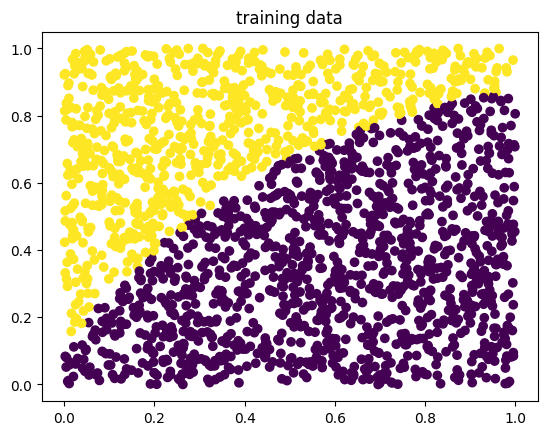

[[0.36969724 0.64696387]
 [0.19898362 0.52560645]
 [0.72201158 0.52756091]
 ...
 [0.33377239 0.05538578]
 [0.55322308 0.74781499]
 [0.26312632 0.50754668]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

print(x_train)

In [3]:
import numpy as np

def graddescent_logistic(X, y, tau, w_init, it, lambda_reg):
    """
    Compute 'it' iterations of gradient descent starting at w_init
    for logistic regression with L2 regularization.
    """
    W = np.zeros((w_init.shape[0], it))
    W[:, [0]] = w_init

    for k in range(it - 1):
        gradient_sum = np.zeros(w_init.shape)
        for i in range(X.shape[0]):  # Loop over all samples
            xi = X[i, :].reshape(-1, 1)
            yi = y[i]
            exponent_term = -yi * (xi.T @ W[:, [k]])
            logistic_gradient = -yi * xi * np.exp(exponent_term) / (1 + np.exp(exponent_term))
            gradient_sum += logistic_gradient

        regularization_gradient = 2 * lambda_reg * W[:, [k]]
        total_gradient = gradient_sum + regularization_gradient

        W[:, [k + 1]] = W[:, [k]] - tau * total_gradient

    return W


Error rate: 863.61


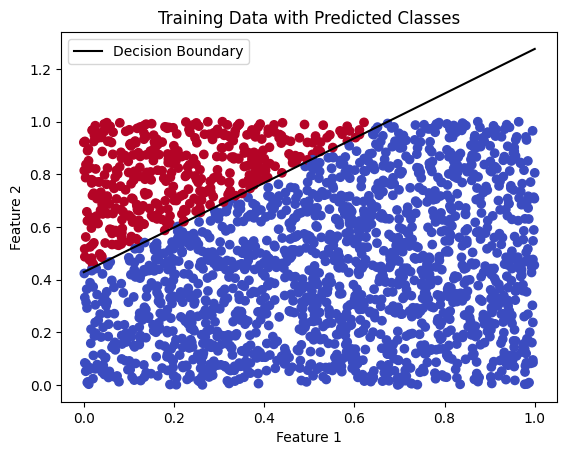

In [10]:
# Load dataset 
x_train_bias = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
w_init = np.zeros((x_train_bias.shape[1], 1))  

# Initialize parameters
tau = 0.01  # Learning rate
lambda_reg = 1  # Regularization parameter
iterations = 1000  # Number of iterations for gradient descent

# Run gradient descent
w_trained = graddescent_logistic(x_train_bias, y_train, tau, w_init, iterations, lambda_reg)

# Extract the final trained weights
w_final = w_trained[:, -1]

# Calculate predictions using the classifier
predictions = np.sign(x_train_bias @ w_final)

# Plot the data points colored by the classifier's predictions
plt.scatter(x_train[:, 0], x_train[:, 1], c=predictions, cmap='coolwarm')
plt.title('Training Data with Predicted Classes')

# Calculate and Plot the Decision Boundary
x1_values = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 100)
x2_values = -(w_final[0] + w_final[1] * x1_values) / w_final[2]  # Solve for x2
plt.plot(x1_values, x2_values, label='Decision Boundary', color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Calculate the Error Rate
errors = np.sum(predictions != y_train)  # Count misclassifications
error_rate = errors / len(y_train)
print(f"Error rate: {error_rate:.2f}")

plt.show()



In [11]:
## Gradient descend for squared-error cost function f(w) = || Aw - d || ^ 2
def graddescent2(X,y,tau,w_init,it):
    """
    compute 10 iterations of gradient descent starting at w1
    w_{k+1}= w_k - tau*X'*(X*w_k - y)
    """
    W = np.zeros((w_init.shape[0],it))
    W[:,[0]] = w_init
    for k in range(it-1):
        W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)
    return W 


C:\Users\admin\AppData\Local\Temp\ipykernel_21140\1988320836.py:10: RuntimeWarning: overflow encountered in matmul
  W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)
C:\Users\admin\AppData\Local\Temp\ipykernel_21140\1988320836.py:10: RuntimeWarning: invalid value encountered in subtract
  W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)


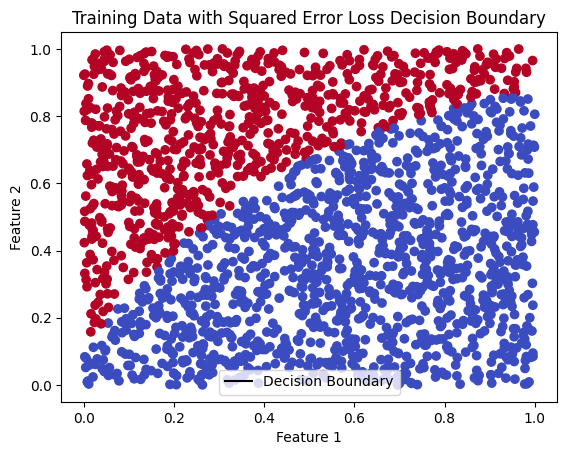

Error rate for squared error loss classifier: 1.00


In [17]:

# Initialize parameters
w_init = np.zeros((x_train_bias.shape[1], 1))  # Make sure to use the bias term
tau = 0.01  # Learning rate
iterations = 1000  # Number of iterations for gradient descent

# Run gradient descent for squared error loss
w_trained_squared_error = graddescent2(x_train_bias, y_train, tau, w_init, iterations)

# Extract the final trained weights
w_final_squared_error = w_trained_squared_error[:, -1]

# Calculate and Plot the Decision Boundary
x1_values = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 100)
x2_values = -(w_final_squared_error[0] + w_final_squared_error[1] * x1_values) / w_final_squared_error[2]
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.flatten(), cmap='coolwarm')
plt.plot(x1_values, x2_values, label='Decision Boundary', color='black')
plt.title('Training Data with Squared Error Loss Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Predict outputs using the squared error loss classifier
y_pred_squared_error = x_train_bias @ w_final_squared_error

# Threshold predictions at 0 to get binary class predictions
# If your y_train is 0 and 1, you may need to adjust the threshold
y_pred_classes = np.sign(y_pred_squared_error)

# Calculate misclassifications
misclassified = np.sum(y_pred_classes != y_train.flatten())

# Compute error rate
error_rate_squared_error = misclassified / len(y_train)
print(f"Error rate for squared error loss classifier: {error_rate_squared_error:.2f}")


C:\Users\admin\AppData\Local\Temp\ipykernel_21140\1988320836.py:10: RuntimeWarning: overflow encountered in matmul
  W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)
C:\Users\admin\AppData\Local\Temp\ipykernel_21140\1988320836.py:10: RuntimeWarning: invalid value encountered in matmul
  W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)
C:\Users\admin\AppData\Local\Temp\ipykernel_21140\1988320836.py:10: RuntimeWarning: invalid value encountered in subtract
  W[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y)


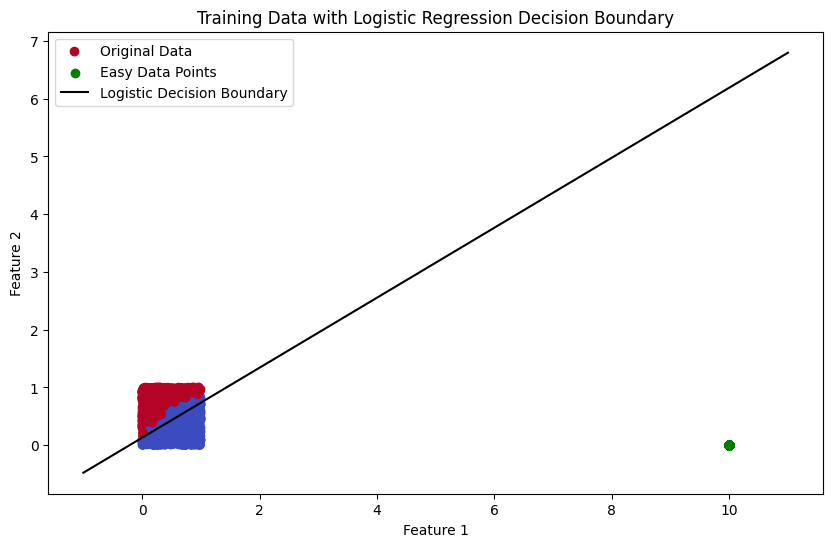

Error rate for logistic regression: 0.12


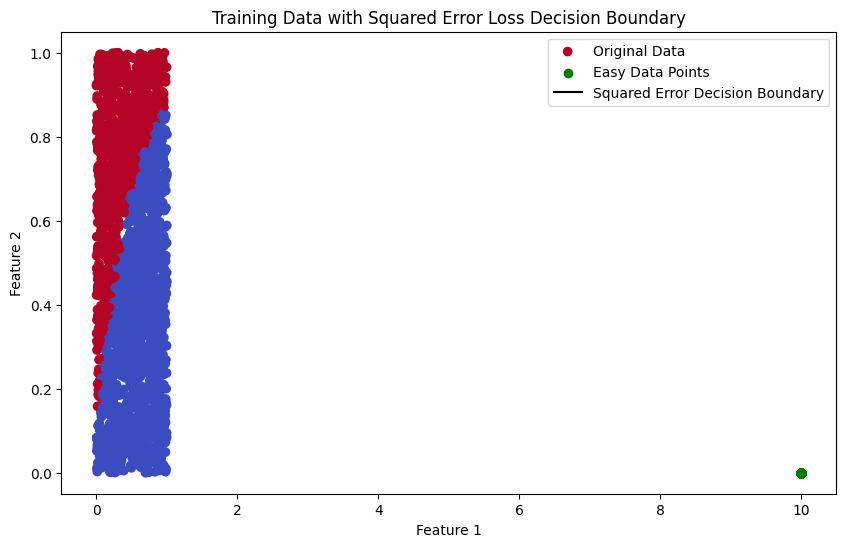

Error rate for squared error loss: 1.00


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Augment the training set
new_x = np.tile(np.array([10, 0]), (1000, 1))  # Create 1000 new x points
new_y = -1 * np.ones((1000, 1))  # Create 1000 new y labels with -1

# Add the bias term for the new data points
new_x_bias = np.hstack((np.ones((new_x.shape[0], 1)), new_x))

# Combine with the original training set
x_train_augmented = np.vstack((x_train_bias, new_x_bias))
y_train_augmented = np.vstack((y_train, new_y))

# Initialize new weights for re-training
w_init = np.zeros((x_train_augmented.shape[1], 1))

# Parameters for gradient descent
tau = 0.01  # Learning rate
lambda_reg = 1  # Regularization parameter for logistic regression
iterations = 1000  # Number of iterations for gradient descent

# Re-train with logistic loss
w_trained_logistic = graddescent_logistic(x_train_augmented, y_train_augmented, tau, w_init, iterations, lambda_reg)[:, -1]

# Re-train with squared error loss
w_trained_squared_error = graddescent2(x_train_augmented, y_train_augmented, tau, w_init, iterations)[:, -1]

# Plot the data points and decision boundary for logistic regression
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.flatten(), cmap='coolwarm', label='Original Data')
plt.scatter(new_x[:, 0], new_x[:, 1], c='green', label='Easy Data Points')
plt.title('Training Data with Logistic Regression Decision Boundary')
x1_values = np.linspace(-1, 11, 100)  # Adjust the range of x values for the new data points
x2_values = -(w_trained_logistic[0] + w_trained_logistic[1] * x1_values) / w_trained_logistic[2]
plt.plot(x1_values, x2_values, label='Logistic Decision Boundary', color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Calculate the error rate for logistic regression
predictions_logistic = np.sign(x_train_augmented @ w_trained_logistic)
errors_logistic = np.sum(predictions_logistic.flatten() != y_train_augmented.flatten())
error_rate_logistic = errors_logistic / len(y_train_augmented)
print(f"Error rate for logistic regression: {error_rate_logistic:.2f}")

# Repeat the plotting and error rate calculation for squared error loss
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.flatten(), cmap='coolwarm', label='Original Data')
plt.scatter(new_x[:, 0], new_x[:, 1], c='green', label='Easy Data Points')
plt.title('Training Data with Squared Error Loss Decision Boundary')
x1_values = np.linspace(-1, 11, 100)  # Adjust the range of x values for the new data points
x2_values = -(w_trained_squared_error[0] + w_trained_squared_error[1] * x1_values) / w_trained_squared_error[2]
plt.plot(x1_values, x2_values, label='Squared Error Decision Boundary', color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Calculate the error rate for squared error loss
predictions_squared_error = x_train_augmented @ w_trained_squared_error
# Assuming y_train is -1 and 1, threshold at 0 for predictions
predictions_squared_error_classes = np.sign(predictions_squared_error)
errors_squared_error = np.sum(predictions_squared_error_classes.flatten() != y_train_augmented.flatten())
error_rate_squared_error = errors_squared_error / len(y_train_augmented)
print(f"Error rate for squared error loss: {error_rate_squared_error:.2f}")


2(f):
When training with logistic loss, the decision boundary is not as sensitive to data points that are far from the boundary, so after adding those easy data points, the decision boundary is pretty similar to that before adding the easy points. However, when training with squared error loss, it is sensitive to the easy data points and theoretically the decision boundary should be pulled toward the newly added points (I wasn't able to find why in my plot it's not doing that).